# XGBoost: Clasificación y analisis de datos

XGBoost es un algoritmo de aprendizaje automático de aprendizaje supervisado basado en un árbol de decisiones y utiliza un marco de potenciación de gradientes.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import xgboost as xgb

C:\Users\pc\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [31]:
data= pd.read_csv("mydatasets/titanic_t.csv")

###  Elección de funciones: selección de funciones

In [32]:
data= data[['Pclass','Sex','Age','Survived','Parch','SibSp']]

In [33]:
data.head()

,Pclass,Sex,Age,Survived,Parch,SibSp
0,3,male,22.0,0,0,1
1,1,female,38.0,1,0,1
2,3,female,26.0,1,0,0
3,1,female,35.0,1,0,1
4,3,male,35.0,0,0,0


###  Encontrando variables

In [34]:
data['Sex'] = data['Sex'].map( {'male':0,'female':1} )

In [35]:
data.head(10)

,Pclass,Sex,Age,Survived,Parch,SibSp
0,3,0,22.0,0,0,1
1,1,1,38.0,1,0,1
2,3,1,26.0,1,0,0
3,1,1,35.0,1,0,1
4,3,0,35.0,0,0,0
5,3,0,NaN,0,0,0
6,1,0,54.0,0,0,0
7,3,0,2.0,0,1,3
8,3,1,27.0,1,2,0
9,2,1,14.0,1,0,1


### Variables con valores nulos y missing values

In [36]:
data = data.dropna()

### Selección de variables output e input

In [37]:
X = data.drop('Survived',axis=1)
y = data['Survived']

### Split train and test

In [38]:
X_train,X_test, y_train, y_test = train_test_split(X,y,random_state =1)

### Chossing Classifier

In [39]:
model = XGBClassifier()

### Fitting model

In [40]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

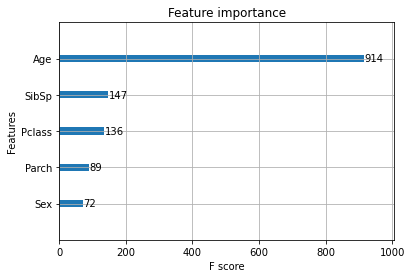

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

xgb.plot_importance(model, ax=plt.gca())

### Prediciendo nuevos valores

In [42]:
predictions = model.predict(X_test)

In [44]:
predictions[1:10]

array([0, 1, 1, 0, 1, 1, 0, 0, 0], dtype=int64)

In [43]:
X_test.loc[0]

Pclass     3.0
Sex        0.0
Age       22.0
Parch      0.0
SibSp      1.0
Name: 0, dtype: float64

## Accuracy

#### Training accuracy

In [45]:
model.score(X_train, y_train) ## accuracy

0.9214953271028037

In [46]:
pred_train = model.predict(X_train)

In [47]:
from sklearn.metrics import confusion_matrix

In [48]:
confusion_matrix(y_train,pred_train)

array([[298,  14],
       [ 28, 195]], dtype=int64)

#### Testing accuracy

In [49]:
model.score(X_test, y_test)

0.8379888268156425

In [50]:
confusion_matrix(y_test,predictions)

array([[98, 14],
       [15, 52]], dtype=int64)